## Observations and Insights 

In [1]:
# %matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Count the total amount of Mice
total_count = combined_data["Mouse ID"].nunique()
total_count


249

In [4]:
duplicate_ID = combined_data[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"])]
duplicate_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
clean_df = combined_data.loc[combined_data["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
len(clean_df["Mouse ID"].value_counts())

248

In [7]:
# Dropping duplicates
combined_data = combined_data.drop_duplicates(subset = "Mouse ID", keep = False)
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
594,b447,Ceftamin,Male,2,30,0,45.0,0
752,d133,Zoniferol,Male,5,30,0,45.0,0
851,f932,Ketapril,Male,15,29,0,45.0,0
938,h428,Ketapril,Female,1,27,0,45.0,0
1163,l872,Placebo,Male,19,30,0,45.0,0
1216,n482,Propriva,Female,4,29,0,45.0,0
1315,o848,Stelasyn,Female,14,27,0,45.0,0
1551,t573,Ceftamin,Female,15,27,0,45.0,0
1583,u153,Ceftamin,Female,11,25,0,45.0,0
1599,v199,Naftisol,Female,17,29,0,45.0,0


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse = combined_data.loc[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicated_mouse

Series([], Name: Mouse ID, dtype: object)

In [9]:
# Create a clean Dataset by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
594,b447,Ceftamin,Male,2,30,0,45.0,0
752,d133,Zoniferol,Male,5,30,0,45.0,0
851,f932,Ketapril,Male,15,29,0,45.0,0
938,h428,Ketapril,Female,1,27,0,45.0,0
1163,l872,Placebo,Male,19,30,0,45.0,0
1216,n482,Propriva,Female,4,29,0,45.0,0
1315,o848,Stelasyn,Female,14,27,0,45.0,0
1551,t573,Ceftamin,Female,15,27,0,45.0,0
1583,u153,Ceftamin,Female,11,25,0,45.0,0
1599,v199,Naftisol,Female,17,29,0,45.0,0


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_data["Mouse ID"].nunique()
clean_count

12

In [11]:
len(clean_data["Mouse ID"].value_counts())

12

## Summary Statistics

In [12]:
# Set the 'Mouse ID' to be our index for easy referencing of rows
combined_data = combined_data.set_index("Mouse ID")

In [13]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_df = clean_df.groupby('Drug Regimen')

# Calculate the mean, median, standard deviation, and sem for each drug
tumor_mean = summary_df["Tumor Volume (mm3)"].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_variance = summary_df["Tumor Volume (mm3)"].var()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Create DataFrame to summarize calculations
summary_grouped_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median,
                                   'Standard Deviation': tumor_stdev, "Variance": tumor_variance, 'SEM': tumor_sem})

summary_grouped_df


,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var", "std","sem"]})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
combine_data = clean_df.groupby("Drug Regimen")["Mouse ID"].count()
combine_data


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

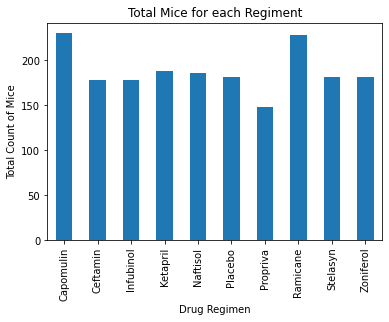

In [16]:
combine_data.plot(kind="bar", title="Total Mice for each Regiment")
plt.ylabel("Total Count of Mice")
plt.show()

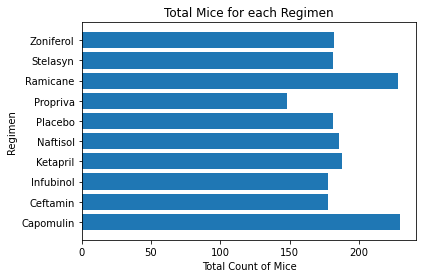

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.barh(combine_data.index, combine_data)

# Set the xlabel and ylabel using class methods
plt.title("Total Mice for each Regimen")
plt.xlabel("Total Count of Mice")
plt.ylabel("Regimen")
plt.show()


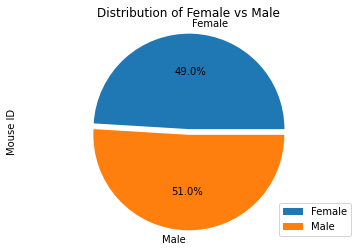

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_count = clean_df.groupby("Sex")["Mouse ID"].count()

mice_count.plot(kind="pie", autopct = "%1.1f%%", title= "Distribution of Female vs Male", explode=(0,0.06))
plt.legend(mice_count.index, loc="lower right")
plt.axis("equal");

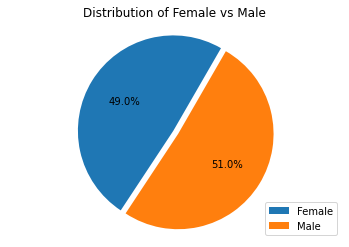

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_count, autopct = "%1.1f%%", explode=(0,0.06), startangle=60)
plt.title("Distribution of Female vs Male")
plt.legend(mice_count.index, loc="lower right")
plt.axis("equal");        


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
four_df = clean_df.loc[clean_df["Drug Regimen"].isin(drug_list)]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = four_df.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
group_df = pd.merge(greatest_timepoint, four_df, on=["Mouse ID", "Timepoint"])
group_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [21]:

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
        # Locate the rows which contain mice on each drug and get the tumor volumes  
    drug_vol= group_df.loc[group_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(drug_vol)
    
    # Determine outliers using upper and lower bounds
 
    quartiles = drug_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of  is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The the median of temperatures is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    outliers = drug_vol.loc[(drug_vol < lower_bound)|(drug_vol > upper_bound)]
    print(f"Drug is {drug}, outliers{outliers}")

The lower quartile of  is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Drug is Capomulin, outliersSeries([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of  is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Drug is Ramicane, outliersSeries([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of  is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outli

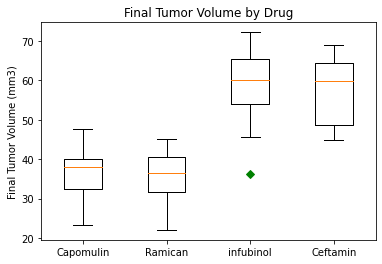

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol, notch=0, sym="gD");
plt.title("Final Tumor Volume by Drug")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramican", "infubinol", "Ceftamin"]);

## Line and Scatter Plots

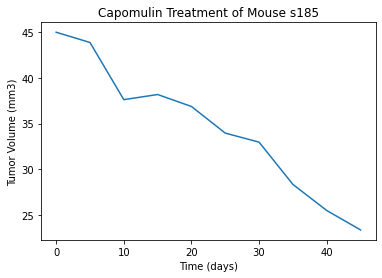

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_data = clean_df.loc[clean_df["Mouse ID"] == "s185"]
mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185"]

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])

# Add labels and title to plot
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (days)")
plt.title("Capomulin Treatment of Mouse s185")

plt.show()

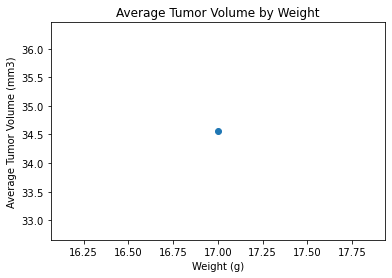

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_mean = capomulin_data.groupby(["Mouse ID"]).mean()

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(capomulin_mean["Weight (g)"], capomulin_mean["Tumor Volume (mm3)"])

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

# Display plot
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
